In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings_data.csv to hotel_bookings_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data preprocessing

#### Handle missing value

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [5]:
# replacing null value with replacement value

replacement_value = {'children': 0,
             'city': 'Unknown',
             'agent': 0,
             'company': 0}

df = df.fillna(replacement_value)

In [6]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Replace irrelevant value

In [7]:
# replacing 'Undefined' from 'meal' column with 'No Meal'

df['meal'].replace('Undefined', 'No Meal', inplace=True)
df.value_counts('meal')

meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
dtype: int64

#### Remove irrelevant data

In [8]:
df['guest'] = df['adults'] + df['children'] + df['babies']
df['guest'].value_counts().sort_index()

0.0       180
1.0     22581
2.0     82051
3.0     10495
4.0      3929
5.0       137
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: guest, dtype: int64

We will remove 180 rows that contains 0 guest

In [9]:
# remove data that has 0 guest

index_guest = df[df['guest'] == 0].index
df.drop(index_guest, inplace=True)
df['guest'].value_counts().sort_index()

1.0     22581
2.0     82051
3.0     10495
4.0      3929
5.0       137
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: guest, dtype: int64

### Comparison of monthly hotel bookings

In [10]:
df_per_month = df.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year': 'nunique', 'reservation_status': 'count'}).reset_index()
df_per_month.columns = ['hotel', 'arrival_date_month', 'year_count', 'reservation_count']
df_per_month

,hotel,arrival_date_month,year_count,reservation_count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


In [11]:
# data normalization

df_per_month['reservation_per_month_year'] = round(df_per_month['reservation_count'] / df_per_month['year_count'])
df_per_month

,hotel,arrival_date_month,year_count,reservation_count,reservation_per_month_year
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


In [12]:
# sort by month

month_num = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8,
             'September': 9, 'October': 10, 'November': 11, 'December': 12}
df_per_month['month_num'] = df_per_month['arrival_date_month'].map(month_num)
df_2 = df_per_month[['hotel', 'month_num', 'arrival_date_month', 'reservation_per_month_year']].sort_values(['hotel', 'month_num'])
df_2

,hotel,month_num,arrival_date_month,reservation_per_month_year
4,City Hotel,1,January,2168.0
3,City Hotel,2,February,2057.0
7,City Hotel,3,March,1865.0
0,City Hotel,4,April,2475.0
8,City Hotel,5,May,3217.0
6,City Hotel,6,June,3734.0
5,City Hotel,7,July,4110.0
1,City Hotel,8,August,3942.0
11,City Hotel,9,September,2690.0
10,City Hotel,10,October,2989.0


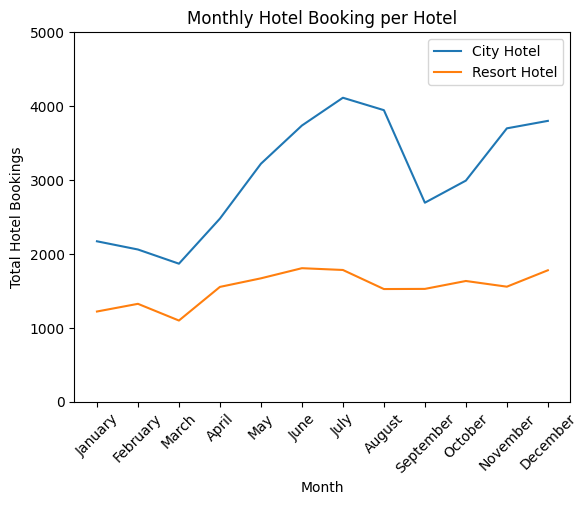

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=df_2['arrival_date_month'], y=df_2['reservation_per_month_year'], hue=df_2['hotel'])

plt.xlabel('Month')
plt.ylabel('Total Hotel Bookings')
plt.ylim(0, 5000)
plt.xticks(rotation=45)
plt.legend()
plt.title('Monthly Hotel Booking per Hotel')
plt.show()

The number of hotel bookings increases in June-July and also November-December. This was caused by the school holidays in Indonesia. Other than holiday season, both hotel exeprienced lower bookings. On peak days, hotel bookings at City Hotel could be twice as much as bookings at Resort Hotel.

### Comparison of cancelation rate and stay duration

In [14]:
df['total_night_stay'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df['total_night_stay'].value_counts().sort_index()

0       645
1     21005
2     27632
3     27064
4     17373
5      7771
6      3846
7      8648
8      1155
9       840
10     1135
11      393
12      220
13      141
14      913
15       72
16       40
17       20
18       35
19       22
20       14
21       71
22       13
23        8
24        6
25       37
26        6
27        4
28       34
29       13
30       13
33        3
34        1
35        5
38        1
42        4
45        1
46        1
48        1
56        2
60        1
69        1
Name: total_night_stay, dtype: int64

In [15]:
# group total_night_stay

week_stay = []

for i in df['total_night_stay']:
  if i <= 7:
     week = '1 week'
  elif i <= 14:
    week = '2 week'
  elif i <= 21:
    week = '3 week'
  elif i <= 28:
    week = '4 week'
  else: week = '>1 month'
  week_stay.append(week)

df['week_stay'] = week_stay

In [16]:
df_3 = df.groupby(['hotel', 'week_stay']).agg({'is_canceled': 'sum', 'reservation_status': 'count'}).reset_index()
df_3.columns = ['hotel', 'week_stay', 'cancel_count', 'total_reservation']
df_3['cancelation_rate'] = df_3['cancel_count'] / df_3['total_reservation'] *100
df_3

,hotel,week_stay,cancel_count,total_reservation,cancelation_rate
0,City Hotel,1 week,32404,77942,41.574504
1,City Hotel,2 week,558,1069,52.198316
2,City Hotel,3 week,76,105,72.380952
3,City Hotel,4 week,21,25,84.000000
4,City Hotel,>1 month,20,22,90.909091
5,Resort Hotel,1 week,9917,36042,27.515121
6,Resort Hotel,2 week,1078,3728,28.916309
7,Resort Hotel,3 week,79,169,46.745562
8,Resort Hotel,4 week,39,83,46.987952
9,Resort Hotel,>1 month,7,25,28.000000


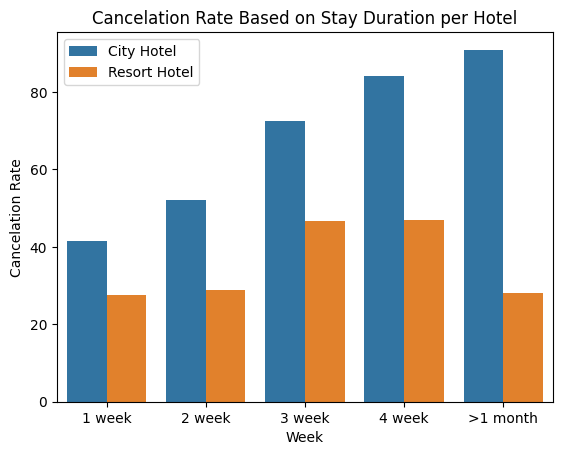

In [17]:
sns.barplot(x=df_3['week_stay'], y=df_3['cancelation_rate'], hue=df_3['hotel'])

plt.xlabel('Week')
plt.ylabel('Cancelation Rate')
plt.legend()
plt.title('Cancelation Rate Based on Stay Duration per Hotel')
plt.show()

Overall, City Hotel has higher cancelation rate compared to Resort Hotel. For City Hotel, increase in stay duration will also increase the cancelation rate. The highest cancelation rate is 90.9%. While for Resort Hotel, the highest cancelation rate happened in week 3-4 with around 47%.

### Comparison of cancelation rate and lead time

In [18]:
df['lead_time'].value_counts().sort_index()

0      6264
1      3445
2      2065
3      1815
4      1710
       ... 
622      17
626      30
629      17
709       1
737       1
Name: lead_time, Length: 479, dtype: int64

In [24]:
# group lead time

lead_time_month = []

for i in df['lead_time']:
  if i <= 60:
    month = '1-2 months'
  elif i <= 120:
    month = '3-4 months'
  elif i <= 180:
    month = '5-6 months'
  elif i <= 240:
    month = '7-8 months'
  elif i <= 300:
    month = '9-10 months'
  elif i <= 360:
    month = '11-12 months'
  else: month = '>12 months'
  lead_time_month.append(month)

df['lead_time_month'] = lead_time_month
df['lead_time_month'].value_counts()

1-2 months      55532
3-4 months      23006
5-6 months      15991
7-8 months       9968
9-10 months      6828
11-12 months     4470
>12 months       3415
Name: lead_time_month, dtype: int64

In [25]:
df_4 = df.groupby(['hotel', 'lead_time_month']).agg({'is_canceled': 'sum', 'reservation_status': 'count'}).reset_index()
df_4.columns = ['hotel', 'lead_time_month', 'cancel_count', 'total_reservation']
df_4['cancelation_rate'] = df_4['cancel_count'] / df_4['total_reservation'] *100
df_4

,hotel,lead_time_month,cancel_count,total_reservation,cancelation_rate
0,City Hotel,1-2 months,9792,35118,27.883137
1,City Hotel,11-12 months,2608,3340,78.083832
2,City Hotel,3-4 months,7178,16344,43.918257
3,City Hotel,5-6 months,5258,10764,48.848012
4,City Hotel,7-8 months,3073,6097,50.401837
5,City Hotel,9-10 months,3096,4636,66.781708
6,City Hotel,>12 months,2074,2864,72.416201
7,Resort Hotel,1-2 months,3550,20414,17.390026
8,Resort Hotel,11-12 months,513,1130,45.398230
9,Resort Hotel,3-4 months,2434,6662,36.535575


In [26]:
sort_month = {'1-2 months': 1, '3-4 months': 2, '5-6 months': 3, '7-8 months': 4, '9-10 months': 5,
              '11-12 months': 6, '>12 months': 7}
df_4['sort_month'] = df_4['lead_time_month'].map(sort_month)
df_4_sorted = df_4[['hotel', 'sort_month', 'lead_time_month',
                    'cancelation_rate']].sort_values(['hotel', 'sort_month'])
df_4_sorted

,hotel,sort_month,lead_time_month,cancelation_rate
0,City Hotel,1,1-2 months,27.883137
2,City Hotel,2,3-4 months,43.918257
3,City Hotel,3,5-6 months,48.848012
4,City Hotel,4,7-8 months,50.401837
5,City Hotel,5,9-10 months,66.781708
1,City Hotel,6,11-12 months,78.083832
6,City Hotel,7,>12 months,72.416201
7,Resort Hotel,1,1-2 months,17.390026
9,Resort Hotel,2,3-4 months,36.535575
10,Resort Hotel,3,5-6 months,36.655826


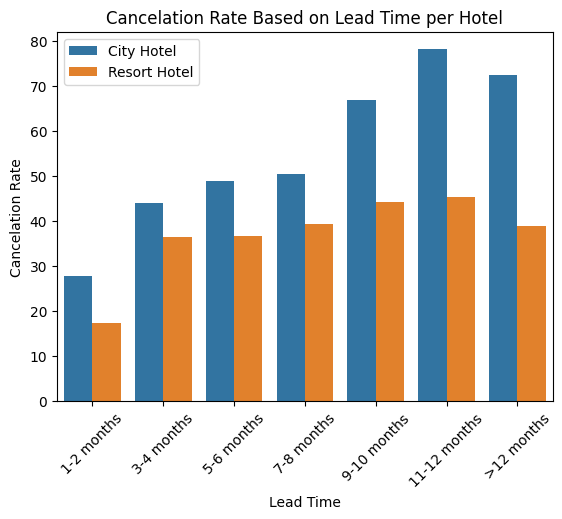

In [27]:
sns.barplot(x=df_4_sorted['lead_time_month'], y=df_4_sorted['cancelation_rate'], hue=df_4_sorted['hotel'])

plt.xlabel('Lead Time')
plt.xticks(rotation=45)
plt.ylabel('Cancelation Rate')
plt.legend()
plt.title('Cancelation Rate Based on Lead Time per Hotel')
plt.show()

Overall, City Hotel has higher cancelation rate compared to Resort Hotel. As lead time increases, cancelation rates are also increasing. Other than less than 2 months lead time, Resort Hotel recorded stagnant cancelation rate at around 40%. </br>
Both hotel reached the highest cancelation rate in 11-12 months lead time. The highest cancelation rate for City Hotel is 78%, while Resort Hotel is 45%.